In [147]:
import numpy as np
import scipy.integrate as sp
import random as rd
import math as mp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [148]:
steps =  5
birds =  50
H     =    1
beta  =    0.3
ndim  =    3

init_vel_max = 18
init_vel_min = 10
init_radius = 50

x_upper_bound = birds * ndim
v_lower_bound = x_upper_bound
v_upper_bound = 2 * birds * ndim

In [149]:
time_values = np.zeros((steps))
for i in range (steps):
    time_values[i] = i

In [150]:
init_phase_space = np.zeros((birds * 2 * ndim))

In [151]:
def get_pos(bird_set, i, k):
    return bird_set[i*ndim + k]
def get_vel(bird_set, i, k):
    return bird_set[v_lower_bound + i*ndim + k]

In [152]:
def pos_diff_norm(bird_set, i, j):
    sum=0
    for k in range(ndim):
        sum += (get_pos(bird_set, i, k) - get_pos(bird_set, j, k))**2
    return sum

In [153]:
def vel_diff_norm(bird_set, i, j):
    sum=0
    for k in range(ndim):
        sum += (get_vel(bird_set, i, k) - get_vel(bird_set, j, k))**2
    return sum

In [154]:
def Aij(bird_set, i, j):
    return H / (pow(1 + pow(vel_diff_norm(bird_set, i, j), 2), beta))

In [155]:
"""
def rhs_equation(t, array):
    vett = np.zeros((birds * 2, ndim))
    for i in range(birds):
        vett[i] = array[i + birds]
    
    j = i
    somma = 0
    while i < (birds * 2):
        while j < (birds * 2):
            if i != j:
                somma += Aij(array[i - birds], array[j - birds]) * (array[j] - array[i])
            j += 1
        vett[i] = somma
        i += 1
    return vett
"""

def rhs_equation(t, phase_space):
    vett = np.zeros(birds * 2 * ndim)    
    
    #equazioni differenziali delle posizioni
    for i in range (birds):
        x_i = i*ndim
        for k in range(ndim):
            vett[x_i + k] = phase_space[i + k]
    
    #equazioni differenziali delle velocità
    for i in range (birds):
        v_i = v_lower_bound + ndim * i
        
        sum = np.zeros((ndim))
        #somma per ogni componente di i
        
        for k in range (ndim):
            for j in range (birds):
                v_jk = get_vel(phase_space, j, k)
                v_ik = get_vel(phase_space, i, k)
                sum[k] += Aij(phase_space, i, j) * (v_jk - v_ik)
            vett[v_i + k] = sum[k]
    return vett

In [156]:
rd.seed()

#inizializzo le posizioni
for i in range (birds):
    x_i = ndim * i
    theta_x = rd.random() * mp.pi
    phi_x = rd.random() * 2 * mp.pi
    r = rd.random() * init_radius
    
    init_phase_space[x_i + 0]= r * mp.cos(phi_x) * mp.sin(theta_x)
    init_phase_space[x_i + 1]= r * mp.sin(phi_x) * mp.sin(theta_x)
    init_phase_space[x_i + 2]= r * mp.cos(theta_x)

#inizializzo le velocità
for i in range (birds):
    v_i = v_lower_bound + ndim * i
    theta_v = rd.random() * mp.pi
    phi_v = rd.random() * 2 * mp.pi
    v = rd.random() * (init_vel_max - init_vel_min) + init_vel_min
    
    init_phase_space[v_i + 0]= v * mp.cos(phi_v) * mp.sin(theta_v)
    init_phase_space[v_i + 1]= v * mp.sin(phi_v) * mp.sin(theta_v)
    init_phase_space[v_i + 2]= v * mp.cos(theta_v)

#print (init_phase_space.reshape(2, birds, ndim))

    
"""
ps = init_phase_space.reshape(2, birds, ndim)[1, :, :]

ax = plt.axes(projection ='3d')
ax.scatter(ps[:, 0], ps[:,1], ps[:,2])
plt.show()

print (init_phase_space.reshape(2, birds, ndim))
"""

"\nps = init_phase_space.reshape(2, birds, ndim)[1, :, :]\n\nax = plt.axes(projection ='3d')\nax.scatter(ps[:, 0], ps[:,1], ps[:,2])\nplt.show()\n\nprint (init_phase_space.reshape(2, birds, ndim))\n"

In [157]:
#f1 = open(f"vel3D birds={birds} steps={steps} b={beta}.txt", "w")
#f2 = open(f"pos3D birds={birds} steps={steps} b={beta}.txt", "w")
#f1.close()
#f2.close()



solution = sp.solve_ivp(fun=rhs_equation,y0 = init_phase_space, t_span=(0,steps))


(300, 77)
[-7.43381376e-02 -7.82661652e-01 -6.92751819e+00 -8.95446771e-01
 -5.46392927e+00  1.13869971e+00  4.12135121e+00  3.77503605e+00
 -4.61863188e+00  1.68099549e-03 -7.24782621e-01 -6.90996502e+00
  7.30140525e-01  3.60005870e-01 -6.95975101e+00 -3.65880239e+00
 -3.93302119e+00 -4.83651265e+00  2.10566800e+00 -2.75847532e+00
 -5.74621931e+00 -3.58395388e+00 -4.46118574e+00  2.61162716e+00
 -9.05062083e-02 -5.39838742e+00 -5.00351173e-02 -2.34621228e+00
  8.03323175e-01 -4.85890602e+00  1.02414124e+00 -2.61133752e+00
 -6.82405947e+00  1.50080985e+00 -2.76752518e+00 -6.99725360e+00
  1.64566911e-01 -2.78986306e-01 -6.85076974e+00  2.43766431e+00
 -4.15245850e+00 -4.17273570e+00 -3.50701385e+00  4.73991884e+00
  4.26223394e-01 -6.11196019e-02 -1.45788864e-01 -7.02255059e+00
  1.75507510e-01 -4.73780841e+00 -4.16641420e+00 -8.07410552e-02
 -5.14304491e-01 -7.11109246e+00 -3.25557537e-01 -2.54325004e+00
 -5.83038566e+00  1.83672537e+00  3.29748394e+00 -5.41072009e+00
  7.61251308e-0

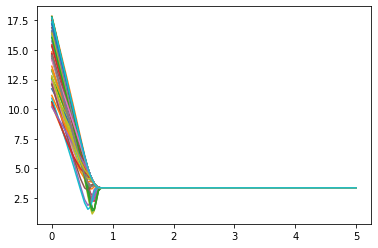

In [160]:
print(solution.y.shape)

pos = solution.y[:x_upper_bound]
vel = solution.y[v_lower_bound:]

times= solution.t

print(vel[:,steps-1])

vel=vel.reshape((birds, ndim, len(times)))
print(vel[:,:, steps-1])

norm_vel = np.zeros((birds, len(times)))
for i in range(birds):
    for t in range(len(times)):
        norm_vel[i, t] = np.linalg.norm(vel[i, :, t])

        
        
for i in range(birds):
    plt.plot(times, norm_vel[i,:])
